# Projeto e Análise de Algoritmos
## Avaliação Teórica de Algoritmos


Plot Matrix

In [36]:
import matplotlib.pyplot as plt
import numpy as np

def plot_matrix(graph):
    data = graph
    dim = len(data)
    fig, ax = plt.subplots(figsize=(dim, dim))
    
    ax.matshow(data, cmap='binary_r',  interpolation='nearest')
    
    for (i, j), z in np.ndenumerate(data):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center',
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    plt.show()

### Floyd Warshall Algorithm

In [44]:
def floyd_warshall(graph):
    dist = graph
    # Number of vertices in the graph 
    V = len(graph)

    for k in range(V): 
        for i in range(V): 
            for j in range(V):
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
    return dist

### Dijkstra Algorithm

In [53]:
def min_distance(dist, sptSet, V):
    min_dist = float('inf')
    min_index = 0 
    
    for v in range(V):
        if (dist[v] < min_dist and sptSet[v] == False):
            min_dist = dist[v]
            min_index = v
            
    return min_index 

In [54]:
def dijkstra(src, graph): 
    V = len(graph)
    dist = [float('inf')] * V
    dist[src] = 0
    sptSet = [False] * V
    
    for cout in range(V):
        u = min_distance(dist, sptSet, V)
        sptSet[u] = True
        for v in range(V):
            if graph[u][v] > 0 and sptSet[v] == False and dist[v] > dist[u] + graph[u][v]:
                dist[v] = dist[u] + graph[u][v]
    return dist

In [55]:
def n_djikstra(graph):
    dist_graph = list()
    for i in range(len(graph)):
        dist_graph.append(dijkstra(i, graph))

    return dist_graph

### Exemplo de execução

In [56]:
INF = float('inf')

graph = [
    [0,   5,    INF,  10], 
    [INF, 0,    3,    INF], 
    [INF, INF,  0,    1], 
    [INF, INF,  INF,  0] 
] 

# gera um grafo de n vertices
#graph = np.random.randint(100, size=(5,5))
# atribui a diagonal, valores iguais a 0
#np.fill_diagonal(graph, 0)

floyd_warshall_graph = floyd_warshall(graph)
n_djikstra_graph = n_djikstra(graph)

In [57]:
floyd_warshall_graph == n_djikstra_graph

True

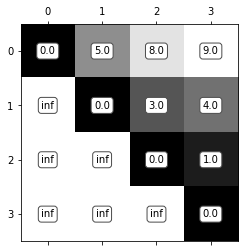

In [58]:
plot_matrix(floyd_warshall_graph)

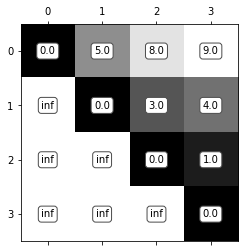

In [59]:
plot_matrix(n_djikstra_graph)

## Análise

### Execução

In [60]:
"""
import random
import time
from datetime import datetime
import numpy as np
import math

# estrutura dos dados
size_time_data = list()
cols = ['size', 'floyd_time', 'djikstra_time']

# semente aleatoria
np.random.seed(42)

# menor valor numero de vertices
N = 1
# maior valor numero de vertices
M = 200

for i in range(N, M):
    
    # gera um grafo de n vertices
    #graph = np.random.randint(pow(2,i), size=(pow(2,i), pow(2,i)))
    graph = np.random.randint(i*5, size=(i*5, i*5))

    # atribui a diagonal, valores iguais a 0
    np.fill_diagonal(graph, 0)

    # floyd
    start_floyd = time.time()
    floyd_warshall(graph)
    end_floyd = time.time()

    delta_time_floyd = end_floyd - start_floyd

    # djikstra
    start_djikstra = time.time()
    n_djikstra(graph)
    end_djikstra = time.time()

    delta_time_djikstra = end_djikstra - start_djikstra

    size_time_data.append([i*5, delta_time_floyd, delta_time_djikstra])

    print('IT: ' + str(i) + ' : ' + str([i*5, delta_time_floyd, delta_time_djikstra]))
"""    

"\nimport random\nimport time\nfrom datetime import datetime\nimport numpy as np\nimport math\n\n# estrutura dos dados\nsize_time_data = list()\ncols = ['size', 'floyd_time', 'djikstra_time']\n\n# semente aleatoria\nnp.random.seed(42)\n\n# menor valor numero de vertices\nN = 1\n# maior valor numero de vertices\nM = 200\n\nfor i in range(N, M):\n    \n    # gera um grafo de n vertices\n    #graph = np.random.randint(pow(2,i), size=(pow(2,i), pow(2,i)))\n    graph = np.random.randint(i*5, size=(i*5, i*5))\n\n    # atribui a diagonal, valores iguais a 0\n    np.fill_diagonal(graph, 0)\n\n    # floyd\n    start_floyd = time.time()\n    floyd_warshall(graph)\n    end_floyd = time.time()\n\n    delta_time_floyd = end_floyd - start_floyd\n\n    # djikstra\n    start_djikstra = time.time()\n    n_djikstra(graph)\n    end_djikstra = time.time()\n\n    delta_time_djikstra = end_djikstra - start_djikstra\n\n    size_time_data.append([i*5, delta_time_floyd, delta_time_djikstra])\n\n    print('IT: 

In [61]:
#df_fl_dj.to_csv('time_execution_['+str(N)+' - '+str(M)+']_'+str(datetime.now())+'.csv')
#df_fl_dj.to_html('time_execution_['+str(N)+' - '+str(M)+']_'+str(datetime.now())+'.html')

### Exibição dos dados

In [62]:
import pandas as pd

In [63]:
df = pd.read_csv('time_execution_[1 - 1000].csv', index_col=0)
#df = pd.read_csv('time_execution_[1 - 101]_2020-09-08 03:38:03.762825.csv')

In [31]:
#df.to_html('time_execution_[1 - 1000].html')

In [64]:
df.sample(7).sort_values(by='size')

,size,floyd_time,djikstra_time
23,120,2.515331,1.581718
37,190,10.068880,6.118031
48,245,21.341610,13.633364
64,325,51.000494,30.907496
92,465,146.129330,86.372986
171,855,869.448126,534.896844
178,890,985.199592,612.827744


In [65]:
df_fl_dj = df

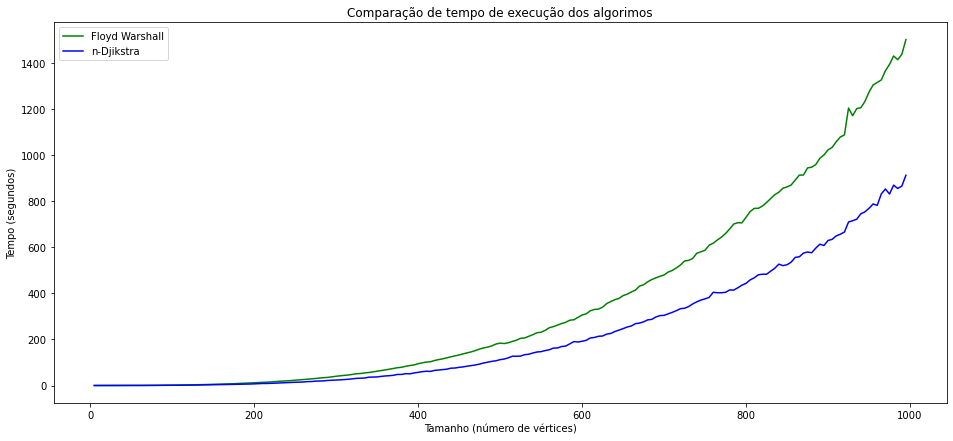

In [67]:
import matplotlib.pyplot as plt
from math import log
import numpy as np

plt.figure(figsize=(16,7))

plt.title('Comparação de tempo de execução dos algorimos')

plt.plot(df_fl_dj['size'], df_fl_dj['floyd_time'], 
        color='green', linestyle='solid')

plt.plot(df_fl_dj['size'], df_fl_dj['djikstra_time'], 
        color='blue', linestyle='solid')


plt.xlabel('Tamanho (número de vértices)')
#plt.xlabel('Tamanho (número de vértices) $2^{n}$')
plt.ylabel('Tempo (segundos)')

plt.legend(['Floyd Warshall', 'n-Djikstra'])

plt.savefig('fld-dkt-t(n)-1-1000.png')

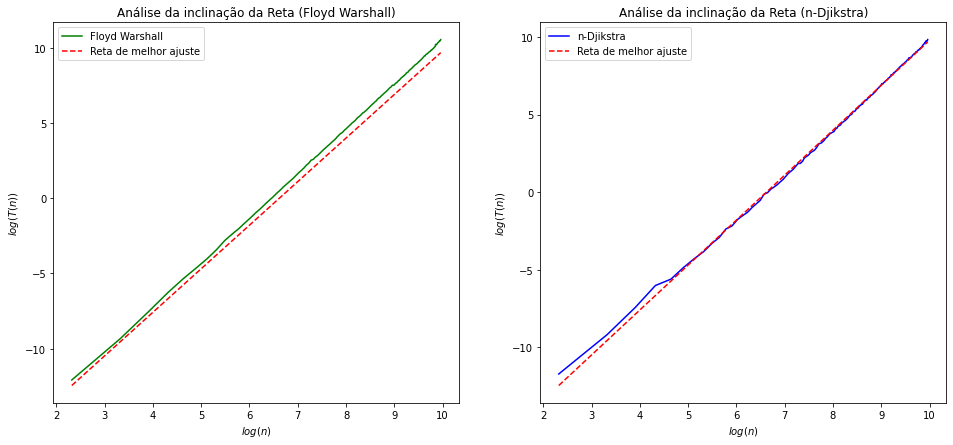

In [87]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from math import log
import numpy as np

lx = np.log2(df_fl_dj['size'])
lyd = np.log2(df_fl_dj['djikstra_time'])
lyf = np.log2(df_fl_dj['floyd_time'])

f_model = LinearRegression().fit(lx.values.reshape(-1,1), lyf.values)
d_model = LinearRegression().fit(lx.values.reshape(-1,1), lyd.values)

plt.figure(figsize=(16,7))

plt.subplot(121)

plt.title('Análise da inclinação da Reta (Floyd Warshall)')
plt.plot(lx, lyf, color='green', linestyle='solid')
plt.plot(lx, f_model.intercept_ + model.coef_ * lx, color='red', linestyle='dashed')

plt.xlabel('$log(n)$')
plt.ylabel('$log(T(n))$')

plt.legend(['Floyd Warshall', 'Reta de melhor ajuste'])

###

plt.subplot(122)

plt.title('Análise da inclinação da Reta (n-Djikstra)')
plt.plot(lx, lyd, color='blue', linestyle='solid')
plt.plot(lx, model.intercept_ + model.coef_ * lx, color='red', linestyle='dashed')

plt.xlabel('$log(n)$')
plt.ylabel('$log(T(n))$')

plt.legend(['n-Djikstra', 'Reta de melhor ajuste'])

plt.savefig('fld-dkt-slope-1-1000.png')

In [18]:
from sklearn.linear_model import LinearRegression
import numpy as np

lx = np.log2(df_fl_dj['size'])
ly = np.log2(df_fl_dj['djikstra_time'])

model = LinearRegression().fit(lx.values.reshape(-1,1), ly.values)
print(model.coef_)

[2.89823618]


In [19]:
import statsmodels.api as sm

lx = sm.add_constant(lx)
res = sm.OLS(ly, lx).fit()
print(res.conf_int(0.05)[0][1])
print(res.conf_int(0.05)[1][1])

2.886697055520229
2.909775304457411
